<a href="https://colab.research.google.com/github/amandaocalvo/furry-waddle/blob/main/Visualizando_Dados_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline

In [ ]:
df = pd.read_csv('state.csv')

In [ ]:
df.head()

,Unnamed: 0,Idade,Genero,UF,Regiao_origem,Nivel Ensino,Area Formacao,Situacao Trabalho,Setor,Trabalha como Gestao,...,Cargo Atual,Nivel,Faixa Salarial,Insatisfacao com a Empresa,Tempo XP em Dados,Tempo XP em Software,Criterios de escolha trabalho,Forma de trabalho atual,Forma de trabalho desejada,Faixa Salarial_number
0,0,38.0,Masculino,CE,NaN,Pós-graduação,Química / Física,Empregado (CLT),Marketing,1.0,...,NaN,Gestor,de R$ 4.001/mês a R$ 6.000/mês,NaN,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,6000.0
1,1,39.0,Masculino,BA,Sudeste,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Consultoria,1.0,...,NaN,Gestor,de R$ 6.001/mês a R$ 8.000/mês,NaN,de 2 a 3 anos,Não tive experiência na área de TI/Engenharia ...,Flexibilidade de trabalho remoto,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,8000.0
2,2,30.0,Masculino,SC,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,1.0,...,NaN,Gestor,de R$ 8.001/mês a R$ 12.000/mês,O clima de trabalho/ambiente não é bom,de 1 a 2 anos,de 2 a 3 anos,Oportunidade de aprendizado e trabalhar com re...,Modelo 100% presencial,Modelo 100% remoto,12000.0
3,3,38.0,Feminino,SP,NaN,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),Serviços,1.0,...,NaN,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Falta de maturidade analítica na empresa,Mais de 10 anos,Menos de 1 ano,"Propósito do trabalho e da empresa, Flexibilid...",Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,16000.0
4,4,36.0,Masculino,SC,NaN,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),Varejo,1.0,...,NaN,Gestor,de R$ 8.001/mês a R$ 12.000/mês,Gostaria de trabalhar em em outra área de atua...,de 1 a 2 anos,de 4 a 5 anos,Maturidade da empresa em termos de tecnologia ...,Modelo 100% presencial,Modelo 100% remoto,12000.0


In [ ]:
len(df)

2365

In [ ]:
df['Genero'].value_counts()

Masculino    1924
Feminino      436
Outro           5
Name: Genero, dtype: int64

Text(0, 0.5, 'Total')

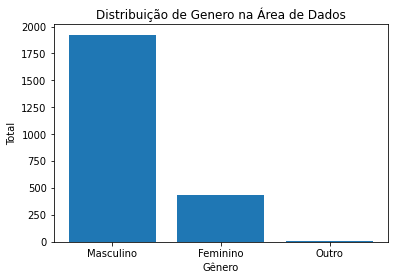

In [ ]:
plt.bar(df['Genero'].unique(), df['Genero'].value_counts())
plt.title('Distribuição de Genero na Área de Dados')
plt.xlabel('Gênero')
plt.ylabel('Total')

Text(0.5, 1.0, "'Distribuição de Genero na Área de Dados'")

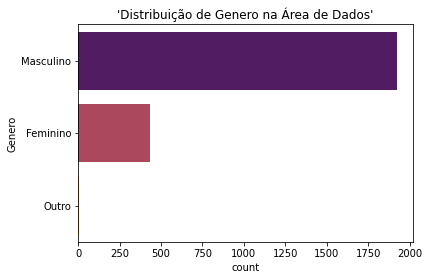

In [ ]:
sns.countplot(y="Genero", data=df, palette="inferno", order=df['Genero'].value_counts().index) \
.set_title("'Distribuição de Genero na Área de Dados'")

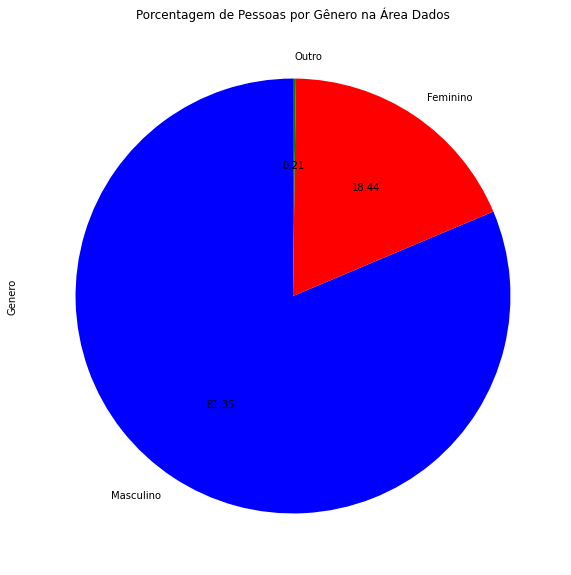

In [ ]:
tmp = pd.DataFrame(df['Genero'].value_counts())
tmp.plot.pie(y='Genero', figsize=(10, 10),autopct='%.2f', title='Porcentagem de Pessoas por Gênero na Área Dados', 
                 startangle=90,legend=False, ylabel=None, colors=['blue', 'red', 'green'])

In [ ]:
tmp = df.groupby('Genero')['Cargo Atual'].value_counts()
tmp.head()

Genero    Cargo Atual                                 
Feminino  Analista de Dados/Data Analyst                  83
          Cientista de Dados/Data Scientist               68
          Analista de BI/BI Analyst/Analytics Engineer    67
          Engenheiro de Dados/Data Engineer               40
          Analista de Negócios/Business Analyst           25
Name: Cargo Atual, dtype: int64

In [ ]:
tmp = tmp.reset_index(name='total')
tmp.head(20)

,Genero,Cargo Atual,total
0,Feminino,Analista de Dados/Data Analyst,83
1,Feminino,Cientista de Dados/Data Scientist,68
2,Feminino,Analista de BI/BI Analyst/Analytics Engineer,67
3,Feminino,Engenheiro de Dados/Data Engineer,40
4,Feminino,Analista de Negócios/Business Analyst,25
5,Feminino,Outro,23
6,Feminino,Desenvolvedor ou Engenheiro de Software,13
7,Feminino,Engenheiro de Machine Learning/ML Engineer,9
8,Feminino,Estatístico,9
9,Feminino,Analista Administrativo,6


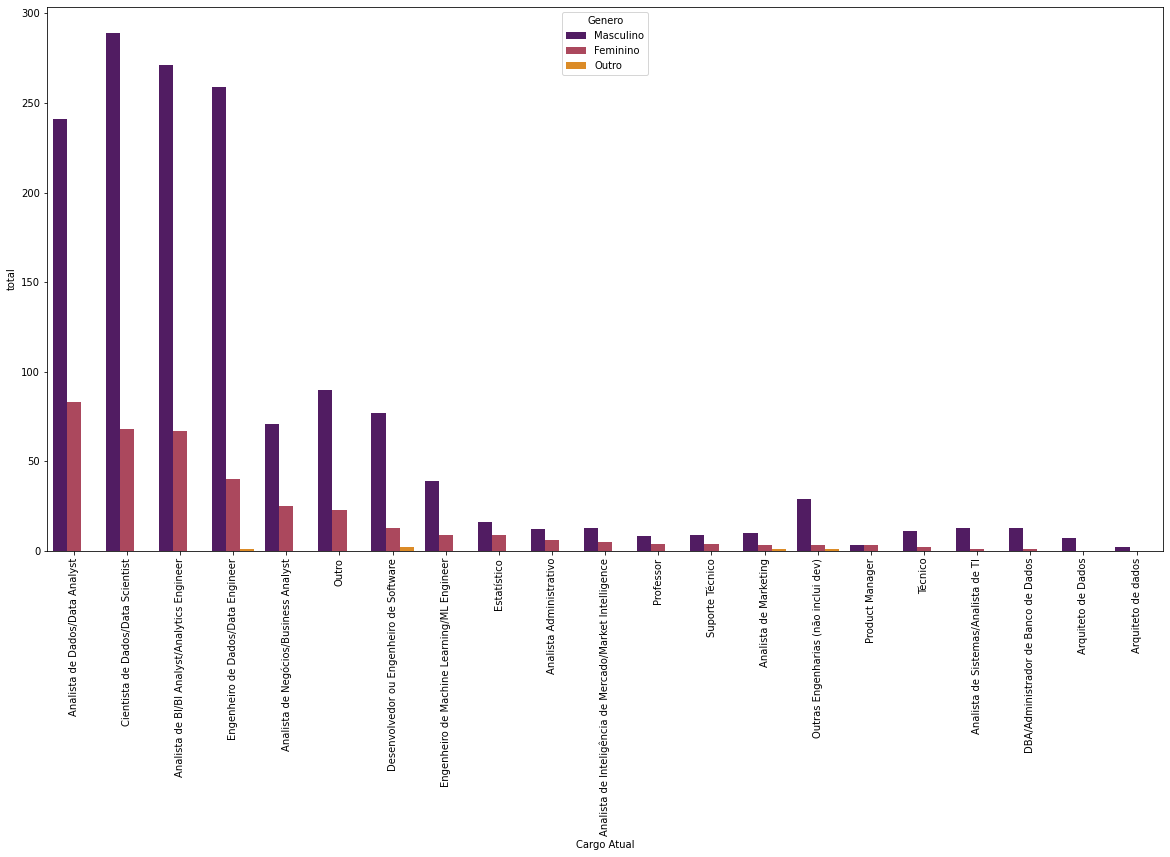

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Cargo Atual', y='total', hue='Genero', data=tmp, hue_order=['Masculino', 'Feminino', 'Outro'], palette='inferno')
plt.xticks(rotation=90);

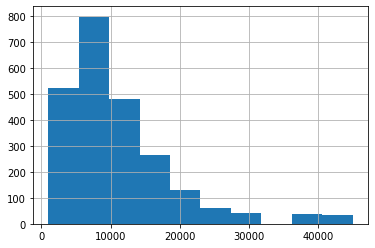

In [ ]:
df['Faixa Salarial_number'].hist()

In [ ]:
df2 = df[df['Cargo Atual'].str.contains('Cientista de Dados', na=False)]

In [ ]:
tmp = df2.groupby(['Genero', 'Nivel'])['Faixa Salarial_number'].mean()

In [ ]:
tmp.head()

Genero     Nivel 
Feminino   Júnior     5615.384615
           Pleno      9600.000000
           Sênior    13882.352941
Masculino  Júnior     5247.191011
           Pleno     10896.825397
Name: Faixa Salarial_number, dtype: float64

In [ ]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Genero,Nivel,Salario Medio
0,Feminino,Júnior,5615.384615
1,Feminino,Pleno,9600.000000
2,Feminino,Sênior,13882.352941
3,Masculino,Júnior,5247.191011
4,Masculino,Pleno,10896.825397


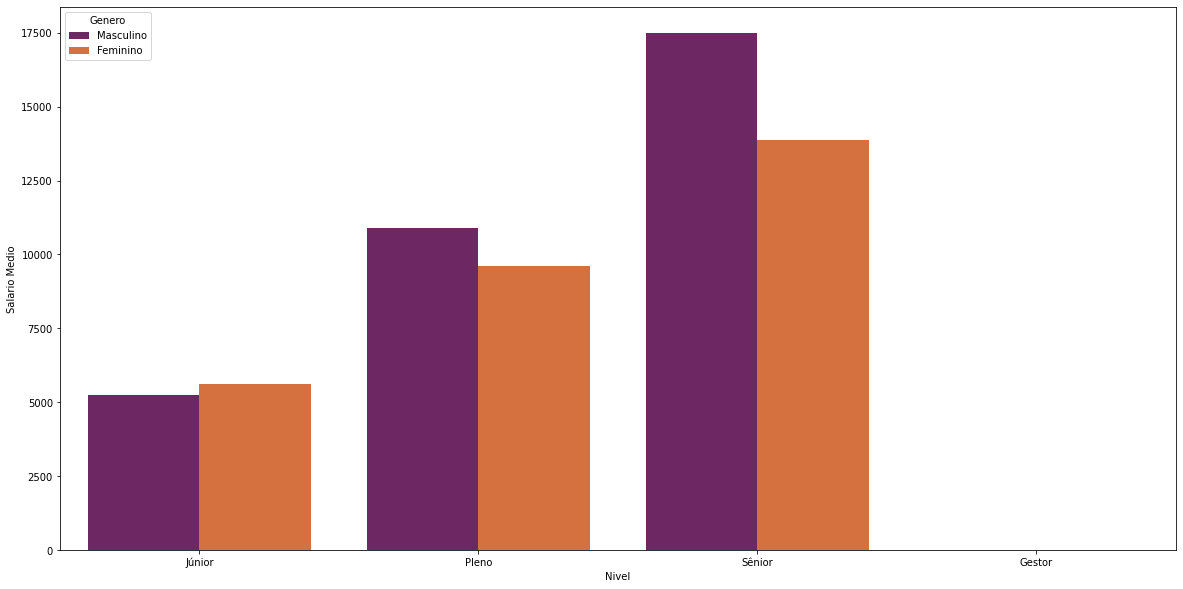

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='Salario Medio', hue='Genero', data=tmp, order=['Júnior', 'Pleno', 'Sênior', 'Gestor'], palette='inferno', hue_order=['Masculino','Feminino'])

In [ ]:
df3 = df[df['Genero'].str.contains('Masculino', na=False)]

In [ ]:
tmp = df3.groupby(['Cargo Atual'])['Faixa Salarial_number'].mean()

In [ ]:
tmp.head()

Cargo Atual
Analista Administrativo                                    3000.000000
Analista de BI/BI Analyst/Analytics Engineer               7527.675277
Analista de Dados/Data Analyst                             7751.037344
Analista de Inteligência de Mercado/Market Intelligence    6846.153846
Analista de Marketing                                      5700.000000
Name: Faixa Salarial_number, dtype: float64

In [ ]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Cargo Atual,Salario Medio
0,Analista Administrativo,3000.000000
1,Analista de BI/BI Analyst/Analytics Engineer,7527.675277
2,Analista de Dados/Data Analyst,7751.037344
3,Analista de Inteligência de Mercado/Market Int...,6846.153846
4,Analista de Marketing,5700.000000


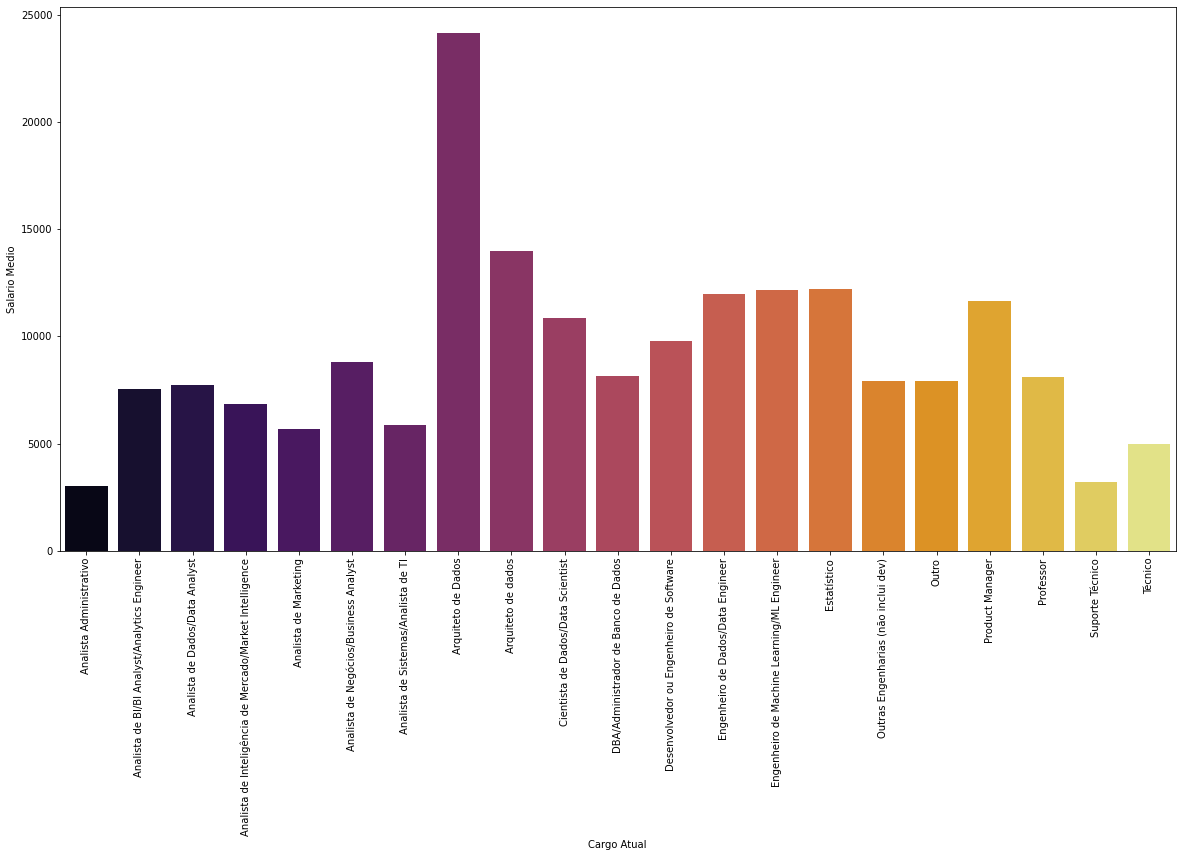

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Cargo Atual', y='Salario Medio', data=tmp, palette='inferno')
plt.xticks(rotation=90);

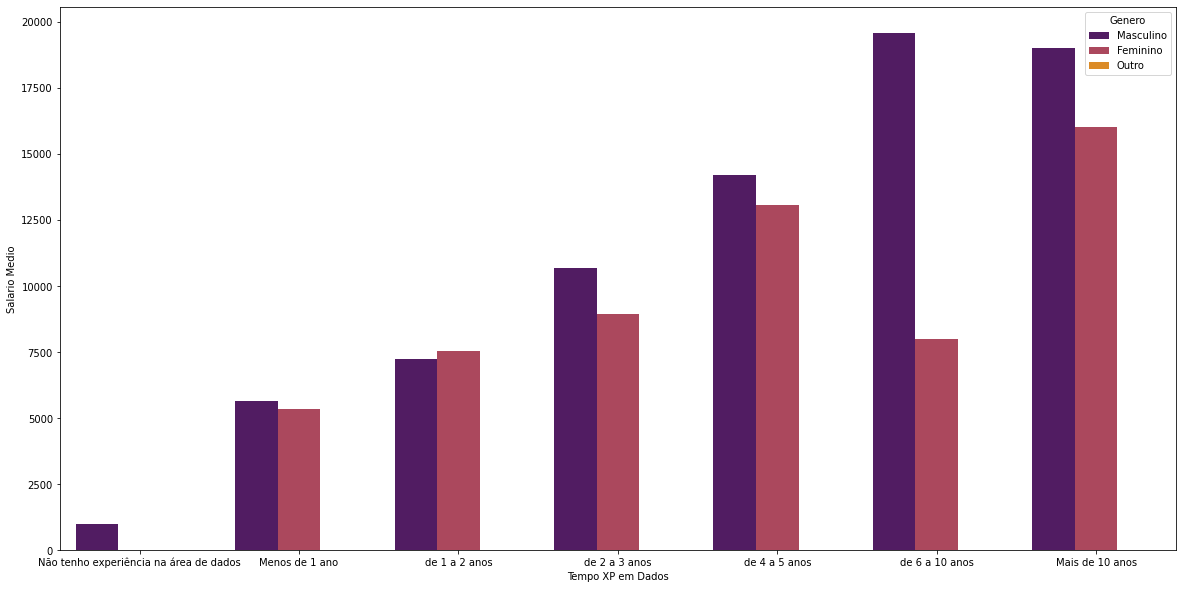

In [ ]:
tmp = df2.groupby(['Genero', 'Tempo XP em Dados'])['Faixa Salarial_number'].mean()
tmp = tmp.reset_index(name='Salario Medio')
plt.figure(figsize=(20,10))
sns.barplot(x='Tempo XP em Dados', y='Salario Medio', hue='Genero', data=tmp, order=['Não tenho experiência na área de dados','Menos de 1 ano', 'de 1 a 2 anos',
       'de 2 a 3 anos', 'de 4 a 5 anos', 'de 6 a 10 anos', 'Mais de 10 anos'],
            hue_order=['Masculino', 'Feminino', 'Outro'], palette='inferno')

In [ ]:
df['Trabalha como Gestao'].value_counts()

0.0    1857
1.0     508
Name: Trabalha como Gestao, dtype: int64

In [ ]:
df4 = df[df['Genero'].str.contains('Masculino', na=False)]

In [ ]:
tmp = df4.groupby(['Trabalha como Gestao'])['Faixa Salarial_number'].mean()

In [ ]:
tmp.head()

Trabalha como Gestao
0.0     9361.429535
1.0    17072.562358
Name: Faixa Salarial_number, dtype: float64

In [ ]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Trabalha como Gestao,Salario Medio
0,0.0,9361.429535
1,1.0,17072.562358


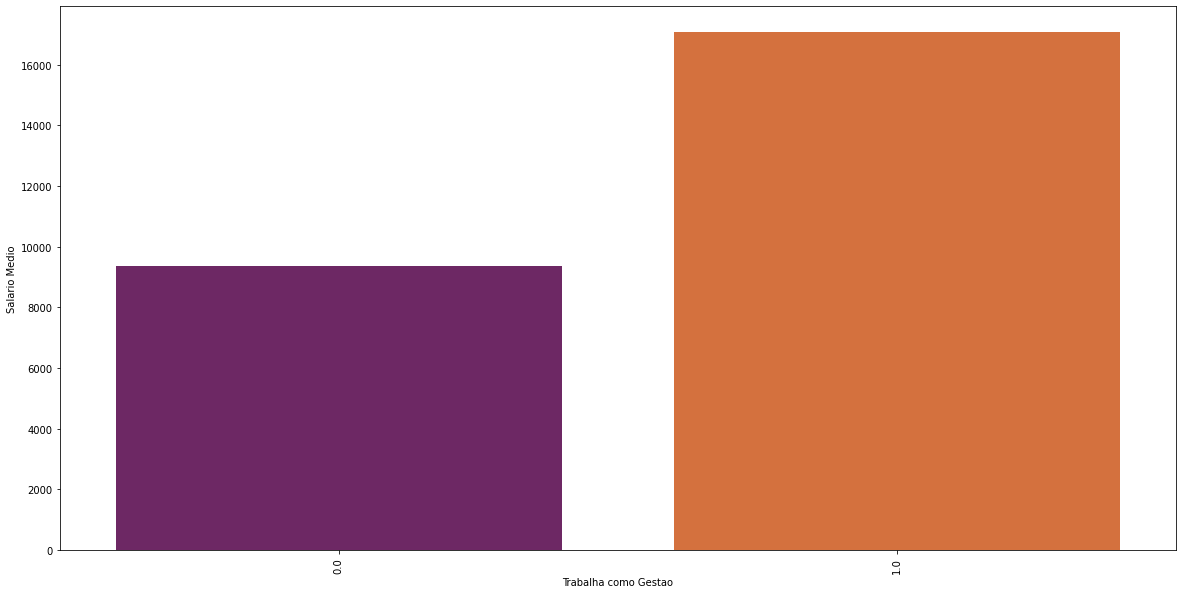

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Trabalha como Gestao', y='Salario Medio', data=tmp, palette='inferno')
plt.xticks(rotation=90);

In [ ]:
df['Trabalha como Gestao'] = df['Trabalha como Gestao'].astype(str)

In [ ]:
oi=df['Trabalha como Gestao']
oi.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Trabalha como Gestao, dtype: object

In [ ]:
df5 = df[df['Genero'].str.contains('Feminino', na=False)]

In [ ]:
tmp = df5.groupby(['Trabalha como Gestao'])['Faixa Salarial_number'].mean()

In [ ]:
tmp.head()

Trabalha como Gestao
0.0     8178.861789
1.0    15731.343284
Name: Faixa Salarial_number, dtype: float64

In [ ]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Trabalha como Gestao,Salario Medio
0,0.0,8178.861789
1,1.0,15731.343284


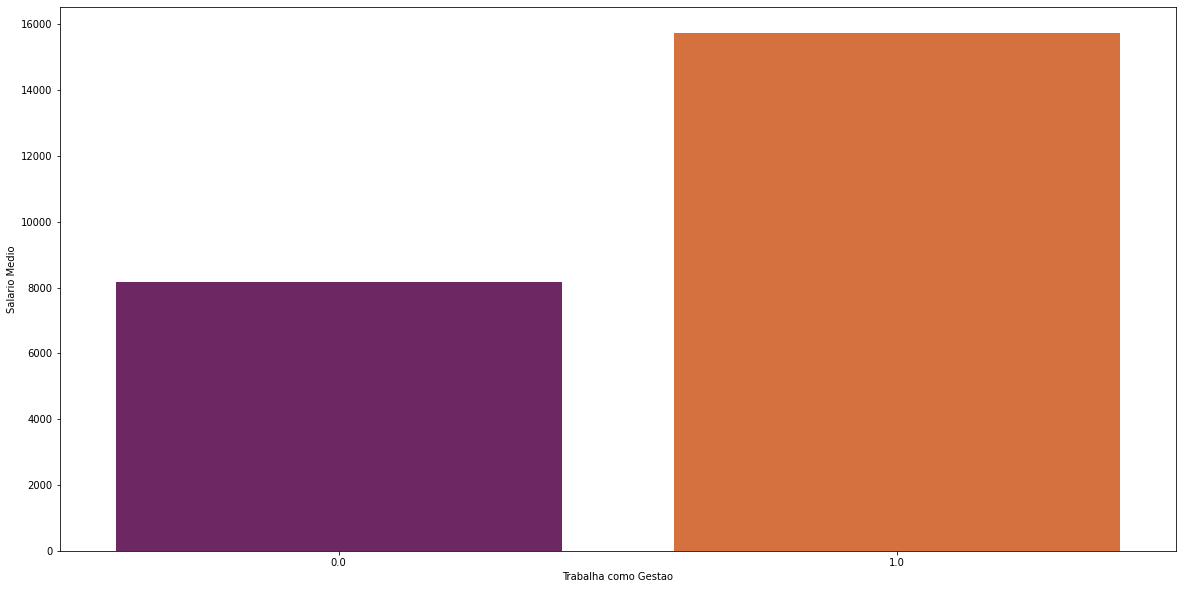

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Trabalha como Gestao', y='Salario Medio', data=tmp, palette='inferno')

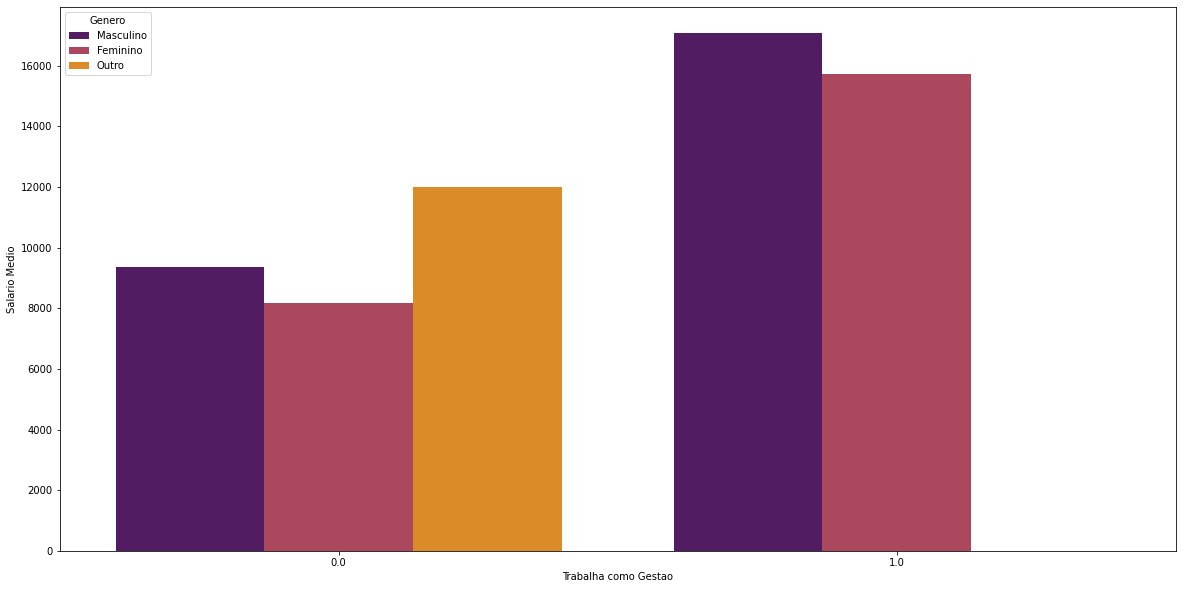

In [ ]:

tmp = df.groupby(['Genero', 'Trabalha como Gestao'])['Faixa Salarial_number'].mean()
tmp = tmp.reset_index(name='Salario Medio')
plt.figure(figsize=(20,10))
sns.barplot(x='Trabalha como Gestao', y='Salario Medio', hue='Genero', data=tmp, hue_order=['Masculino', 'Feminino', 'Outro'], palette='inferno')